## Testing the Raytrace Software ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import raytrace as rt
import numpy as np
import math
from pylab import *
from raytrace import implane
import rtcore

/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
# @ R.Sharma 21-11-2025

trace = rt.implane([60,60],
                   [-2.0,-2.0,2.0,2.0],
                   (215,0,0),
                   25.0,
                   80e6,
                   mode='TbrIQUV',
                   trknpmax=None)
implane.package = '/home/hp/raytrace/py_raytr_threaded'
trace.set_plfunc('/home/hp/raytrace_scripts/plasma_parameters.c')
#rtcore.remove_streamers()

def pf2ne(pf_hz):
    '''arprm
    Input: plasma freqeuncy in hz 
    Output: Electron density (cm^{-3})
    '''
    return (pf_hz/9000)**2

def ne2pf(ne):
    '''
    Input: Electron density (cm^{-3})
    Output: plasma freqeuncy in hz 
    '''
    return 9000*(ne)**0.5

plf_cname =  plasma_parameters.c
fname =  plasma_parameters.c
dname =  /home/hp/raytrace_work/raytrace_scripts
bfname =  plasma_parameters.c
name =  plasma_parameters
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c /home/hp/raytrace_work/raytrace_scripts/streamer.c -o streamer.o
gcc -g -fPIC  -I/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/inc -c plasma_parameters.c -o plasma_parameters.o
gcc -shared streamer.o plasma_parameters.o -L/home/hp/miniconda3/envs/py27/lib/python2.7/site-packages/raytrace/lib -L/usr/lib -lm -lmxv -o plasma_parameters.so
Error: no such file "/home/hp/raytrace_scripts/plasma_parameters.c".


* Ray tracing code is below 

In [3]:
DeltaS=0.01  # Initial ray path increment in solar radii
freq_hz = 1.e8 # 100 MHz # Hz, radio wave frequency
c = 3.e10 # in cm/s
Rsun  = 7.e10 # in cm
Rsun_km = Rsun / 1.e5
omega = 2*np.pi*freq_hz # rad/s, radio wave frequency
freq2 = freq_hz * freq_hz # Hz^2, radio wave frequency squared
omega2 = omega * omega # (rad/s)^2, radio wave frequency squared
k0 = omega / c # # k0 = omega/c_light_cms, wave number in a vacuum
k0_Rsun = k0 * Rsun # k0 = omega/c_light_Rsun, wave # in rad/Rsun
rhocr =  pf2ne(freq_hz) # Critical density at given self.freq
rhocr_inv = 1 / rhocr # 1/self.RhoCr
tol = 0.005
tol2 = tol**2
#ds = np.empty((ny, nx), dtype=np.double)
#ds[:] = self.DeltaS
#absminstep = 1e-4*np.average(ds)Coulomb_log
absminstep = 1e-4
toleps = 1e-6
cntmax = 50.
h_chromo_km = 10000
r_chromo = (Rsun_km + h_chromo_km - 1000.)/Rsun_km
r_chro_cor = (Rsun_km + h_chromo_km)/Rsun_km
r_corona = (Rsun_km + h_chromo_km + 1000.)/Rsun_km
c_light_cms = 2.9979245800e10
ProtonChargeCGSe = 4.80320427e-10
ProtonMass_g = 1.672621638e-24
ProtonMassInv = 1./ProtonMass_g
ElectronMass_g = 9.10938215e-28
Boltzmannk_ergK = 1.380650424e-16
Rsun_cm = 6.955e10
Rsun_km = 6.955e5
Te_corona_K = 1.0e6
Te_chromo_K = 3.0e4
AU_m = 149597870700
AU_Rsun = 215.097
Coulomb_log = 20.0
Msun_G = 1.0
Mdir = np.array((0., 0., 1.), dtype=np.double)
e2 = (ProtonChargeCGSe)**2
e2w2 = e2/omega2
e_ovr_mcw2 = e2w2/((ElectronMass_g*                  \
                           c_light_cms)**2)
e2_4pi_ovr_m = 4.*np.pi*e2/ElectronMass_g
e2_4pi_ovr_mw2 = 4.*np.pi*e2w2/ElectronMass_g
twokf2c2 = 2.*Boltzmannk_ergK*freq2/            \
                   c_light_cms
lnLambda_13p7 = 13.7*Coulomb_log
cnu = 5.5
callcount = 1.0


In [4]:


#rtcore.make_streamer(90,90,0)
implane.arprm = np.array((
            DeltaS,     
            #self.rsph+0.01,  # Radius of the integrarion sphere + a bit more
            freq_hz,       
            omega,      
            freq2,      
            omega2,     
            k0,         
            k0_Rsun,    
            rhocr,           
            rhocr_inv,  
            tol,        
            tol2,       
            absminstep, 
            toleps,     
            cntmax,      # Upper limit to Newton iterations number
            h_chromo_km,     # km, Chromosphere thickness
            r_chromo,   # in Rsun units: "top" of chromosphere
            r_chro_cor, # in Rsun units: chromosphere-corona "border"
            r_corona,   # in Rsun units: "bottom" of corona
            c_light_cms,      # cm/s, Speed of light
            ProtonChargeCGSe,   # StatCoulombs, CGSe
            ProtonMass_g,       # g
            ProtonMassInv,      # 1/g
            ElectronMass_g,     # g
            Boltzmannk_ergK,    # erg/K, Boltzmann constant 
            Rsun_cm,         # cm, Solar radius
            Rsun_km,         # km, Solar radius
            Te_corona_K,     # K
            Te_chromo_K,     # K
            AU_m,      # Sun-earth distance (1 AU) in meters
            AU_Rsun,   # Sun-earth distance (1 AU) in solar radii
            Msun_G,    # G/Rsun^3, solar dipole field at equator
            Mdir[0],         # Solar dipole x direction, CGI
            Mdir[1],         # Solar dipole y direction, CGI
            Mdir[2],         # Solar dipole z direction, CGI
            e_ovr_mcw2,           # (e/mcw)^2
            e2_4pi_ovr_m,
            e2_4pi_ovr_mw2,
            twokf2c2,
            lnLambda_13p7,
            cnu,             # Coef. at Ginzburg's nu_eff
            callcount        # Number of calls to advance_beam()
            ), dtype=np.double)
                    
print(implane.arprm)

[1.00000000e-02 1.00000000e+08 6.28318531e+08 1.00000000e+16
 3.94784176e+17 2.09439510e-02 1.46607657e+09 1.23456790e+08
 8.10000000e-09 5.00000000e-03 2.50000000e-05 1.00000000e-04
 1.00000000e-06 5.00000000e+01 1.00000000e+04 1.01285714e+00
 1.01428571e+00 1.01571429e+00 2.99792458e+10 4.80320427e-10
 1.67262164e-24 5.97863843e+23 9.10938215e-28 1.38065042e-16
 6.95500000e+10 6.95500000e+05 1.00000000e+06 3.00000000e+04
 1.49597871e+11 2.15097000e+02 1.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 7.83579612e-04 3.18260731e+09
 8.06163849e-09 9.21070819e-11 2.74000000e+02 5.50000000e+00
 1.00000000e+00]


In [5]:
# Example: trkparms=['bfield', 'arclen', 'rho', 'Stokes']
trkparms_=['bfield', 'arclen', 'rho', 'Stokes']
trkrays_=np.array([[2,5],[3,3],[4,4]])
# print(trkrays)
# if (trkrays != None):
#     print('yes')

print('Shape of trkrays',np.array(trkrays_).shape)
trace.trace(niter = 100, trkrays=trkrays_, trkparms=trkparms_)
print(trace)

('Shape of trkrays', (3, 2))
<raytrace.raytrace.implane instance at 0x7f9cedf59370>


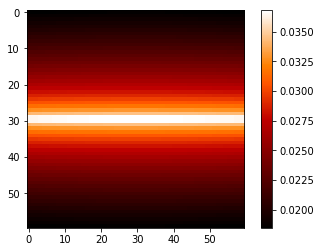

In [6]:

fig = figure()
imshow(trace.tbriquv[:,:,0],cmap=cm.gist_heat)
colorbar()
show()

This the text
1. I did task 1
2. I did task 2